### 인도 시장 공략 방안

In [98]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf

from statsmodels.api import qqplot,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Ridge,Lasso,ElasticNet

import warnings
warnings.filterwarnings('ignore')


In [99]:
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [100]:
matplotlib.rc('font',family='Noto Sans CJK JP')
matplotlib.rc('axes',unicode_minus=False)

In [101]:
df_raw=pd.read_csv('/home/piai/BigData/Project/Car.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


### 단위 제거

In [102]:
# 단위 제거
df_raw['Mileage']=df_raw['Mileage'].str.replace('kmpl','')
df_raw['Engine']=df_raw['Engine'].str.replace('CC','')
df_raw['Power']=df_raw['Power'].str.replace('bhp','')
df_raw
# df_raw_dummy=pd.get_dummies(df_raw,drop_first=True)
# df_raw_dummy.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN


In [103]:
# 연속형 중 0은 결측치로 처리
df_raw.replace('0',None)

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN


In [104]:
# 타겟 변수인 Price의 결측치 행 제거 
df_raw = df_raw.dropna(subset='Price')
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047,69,5.0,7.06 Lakh
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.0,1497,121.36,5.0,8.79 Lakh
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.0,1368,160,5.0,18.16 Lakh
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.3,1248,88.5,5.0,10.57 Lakh


In [105]:
df_raw['Price'].isnull().sum()

0

### 범주형 데이터 처리

In [106]:
# Owner_type 의 특성값 확인
df_raw['Owner_Type'].value_counts()

First             5095
Second             983
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [107]:
# 연속형 데이터로 변경
# First -> 1
df_raw['Owner_Type']=df_raw['Owner_Type'].replace('First',1)
# Second -> 2
df_raw['Owner_Type']=df_raw['Owner_Type'].replace('Second',2)
# Third -> 3
df_raw['Owner_Type']=df_raw['Owner_Type'].replace('Third',3)
# etc -> 4
df_raw['Owner_Type']=df_raw['Owner_Type'].replace('Fourth & Above',4)
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,26.6,998,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,19.67,1582,126.2,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,18.2,1199,88.7,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,20.77,1248,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,15.2,1968,140.8,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,1,27.28,1047,69,5.0,7.06 Lakh
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,1,17.0,1497,121.36,5.0,8.79 Lakh
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,1,16.0,1368,160,5.0,18.16 Lakh
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,1,24.3,1248,88.5,5.0,10.57 Lakh


In [108]:
# Transmission 의 특성값 확인
df_raw['Transmission'].value_counts()

Manual       4416
Automatic    1784
Name: Transmission, dtype: int64

In [109]:
# 연속형 데이터로 변경
# Manual -> 0
df_raw['Transmission']=df_raw['Transmission'].replace('Manual',0)
# Automatic -> 1
df_raw['Transmission']=df_raw['Transmission'].replace('Automatic',1)

In [110]:
# Fuel_Type 의 특성값 확인
df_raw['Fuel_Type'].value_counts()

Diesel      3301
Petrol      2830
CNG           57
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [111]:
# 연속형 데이터로 변경
df_raw['Fuel_Type']=df_raw['Fuel_Type'].replace('Diesel',0)
df_raw['Fuel_Type']=df_raw['Fuel_Type'].replace('Petrol',1)
df_raw['Fuel_Type']=df_raw['Fuel_Type'].replace('CNG',2)
df_raw['Fuel_Type']=df_raw['Fuel_Type'].replace('LPG',2)
df_raw['Fuel_Type']=df_raw['Fuel_Type'].replace('Electric',2)
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,2,0,1,26.6,998,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,0,0,1,19.67,1582,126.2,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,1,0,1,18.2,1199,88.7,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,0,0,1,20.77,1248,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,0,1,2,15.2,1968,140.8,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,0,0,1,27.28,1047,69,5.0,7.06 Lakh
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,1,0,1,17.0,1497,121.36,5.0,8.79 Lakh
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,1,0,1,16.0,1368,160,5.0,18.16 Lakh
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,0,0,1,24.3,1248,88.5,5.0,10.57 Lakh


### 결측치 처리

In [112]:
# 결측치 확인
df_raw.isnull().sum()

Name                    0
Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
dtype: int64

In [113]:
# Mileage의 결측치를 평균값으로 대체
df_raw['Mileage']=df_raw['Mileage'].astype('float64')
df_raw.loc[df_raw['Mileage'] != df_raw['Mileage'], 'Mileage'] = df_raw['Mileage'].mean()

In [114]:
df_raw['Mileage'].isnull().sum()

0

In [115]:
# Engine의 결측치를 평균값으로 대체
df_raw['Engine']=df_raw['Engine'].astype('float64')
df_raw.loc[df_raw['Engine'] != df_raw['Engine'], 'Engine'] = df_raw['Engine'].mean()

In [116]:
df_raw['Engine'].isnull().sum()

0

In [117]:
# Power의 결측치를 평균값으로 대체
df_raw['Power']=df_raw['Power'].replace('null ',None)
df_raw['Power']=df_raw['Power'].astype('float64')
df_raw.loc[df_raw['Power'] != df_raw['Power'], 'Power'] = df_raw['Power'].mean()


In [118]:
df_raw['Power'].isnull().sum()

0

In [119]:
df_raw.isnull().sum()

Name                    0
Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  42
New_Price            5195
dtype: int64

In [120]:
# 'seats' 결측치 행 제거
df_raw = df_raw.dropna(subset='Seats')
df_raw.isnull().sum()

Name                    0
Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5153
dtype: int64

In [121]:
# 중고차 가격에 큰 영향을 못 미치는 'New_Price' 열 제거 + 결측치 제거
del df_raw['New_Price']
df_raw.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

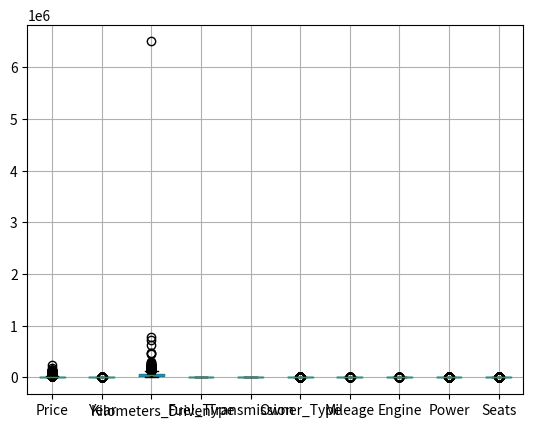

In [122]:
df_raw.boxplot()
plt.show()

#### Kilometers_Driven에 이상치 발견, 단 하나의 데이터가 터무니 없이 높기 때문에 제거.

#### 이상치 제거

In [123]:
df_raw['Kilometers_Driven']=df_raw['Kilometers_Driven'].astype('float64')

In [124]:
# 이상치 제거
df_raw= df_raw[df_raw['Kilometers_Driven'] < 6500000 ]

In [125]:
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000.0,2,0,1,26.60,998.0,58.16,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000.0,0,0,1,19.67,1582.0,126.20,5.0
2,Honda Jazz V,Chennai,6898.32,2011,46000.0,1,0,1,18.20,1199.0,88.70,5.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000.0,0,0,1,20.77,1248.0,88.76,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670.0,0,1,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413.0,0,0,1,27.28,1047.0,69.00,5.0
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015.0,1,0,1,17.00,1497.0,121.36,5.0
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000.0,1,0,1,16.00,1368.0,160.00,5.0
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380.0,0,0,1,24.30,1248.0,88.50,5.0


In [126]:
df_raw.boxplot()


<Axes: >

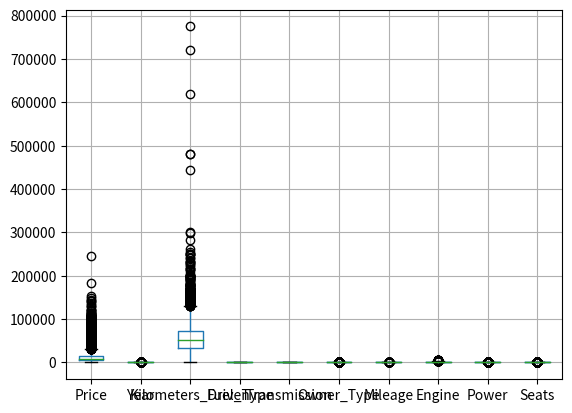

In [127]:
plt.show()

####

In [128]:
# 차량의 브랜드를 저장
df_raw['Brand']=df_raw['Name'].apply(lambda x : x.split()[0])
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000.0,2,0,1,26.60,998.0,58.16,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000.0,0,0,1,19.67,1582.0,126.20,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000.0,1,0,1,18.20,1199.0,88.70,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000.0,0,0,1,20.77,1248.0,88.76,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670.0,0,1,2,15.20,1968.0,140.80,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413.0,0,0,1,27.28,1047.0,69.00,5.0,Tata
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015.0,1,0,1,17.00,1497.0,121.36,5.0,Ford
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000.0,1,0,1,16.00,1368.0,160.00,5.0,Jeep
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380.0,0,0,1,24.30,1248.0,88.50,5.0,Maruti


In [129]:
# 차량의 연식을 저장
df_raw['Year']=df_raw['Year'].astype('int64')
df_raw['Age']=2023-df_raw['Year']
# 차량의 연식 (Age)에 대한 데이터를 따지기 위해 제거
del df_raw['Year']
df_raw.describe()

,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age
count,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000
mean,14936.035899,57041.169076,0.476856,0.288127,1.197174,18.227271,1619.877051,113.294040,5.278545,9.538087
std,17668.811011,37755.474496,0.521461,0.452927,0.449646,4.517890,601.209852,53.695356,0.808429,3.249239
min,7.080000,171.000000,0.000000,0.000000,1.000000,0.000000,72.000000,34.200000,0.000000,4.000000
25%,5365.360000,33000.000000,0.000000,0.000000,1.000000,15.260000,1198.000000,76.800000,5.000000,7.000000
50%,8814.520000,52378.000000,0.000000,0.000000,1.000000,18.200000,1493.000000,98.600000,5.000000,9.000000
75%,15881.470000,72132.000000,1.000000,1.000000,1.000000,21.100000,1978.000000,138.100000,5.000000,11.000000
max,245273.600000,775000.000000,2.000000,1.000000,4.000000,33.540000,5998.000000,616.000000,10.000000,25.000000


In [130]:
df_raw.reset_index(drop = True, inplace = True)

##### Brand의 종류가 200대 미만은 etc로 처리 

In [131]:
df_raw['Brand'].value_counts()  # Audi까지 살림

Maruti           1240
Hyundai          1121
Honda             615
Toyota            422
Mercedes-Benz     325
Volkswagen        321
Ford              302
Mahindra          282
BMW               267
Audi              241
Tata              195
Skoda             182
Renault           151
Chevrolet         121
Nissan             95
Land               57
Jaguar             43
Mitsubishi         34
Mini               29
Fiat               28
Volvo              21
Jeep               19
Porsche            18
Datsun             17
ISUZU               3
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Name: Brand, dtype: int64

In [132]:
s = list(df_raw['Brand'].value_counts().index)[10:]
s

['Tata',
 'Skoda',
 'Renault',
 'Chevrolet',
 'Nissan',
 'Land',
 'Jaguar',
 'Mitsubishi',
 'Mini',
 'Fiat',
 'Volvo',
 'Jeep',
 'Porsche',
 'Datsun',
 'ISUZU',
 'Force',
 'Bentley',
 'Smart',
 'Ambassador',
 'Lamborghini']

In [133]:
for i in range(len(df_raw)):
    if df_raw.loc[i, 'Brand'] in s:
        df_raw.loc[i, 'Brand'] = 'etc'

In [134]:
df_raw['Brand'].value_counts()

Maruti           1240
Hyundai          1121
etc              1021
Honda             615
Toyota            422
Mercedes-Benz     325
Volkswagen        321
Ford              302
Mahindra          282
BMW               267
Audi              241
Name: Brand, dtype: int64

In [135]:
df_raw

,Name,Location,Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Age
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,72000.0,2,0,1,26.60,998.0,58.16,5.0,Maruti,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,41000.0,0,0,1,19.67,1582.0,126.20,5.0,Hyundai,8
2,Honda Jazz V,Chennai,6898.32,46000.0,1,0,1,18.20,1199.0,88.70,5.0,Honda,12
3,Maruti Ertiga VDI,Chennai,9197.76,87000.0,0,0,1,20.77,1248.0,88.76,7.0,Maruti,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,40670.0,0,1,2,15.20,1968.0,140.80,5.0,Audi,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,41413.0,0,0,1,27.28,1047.0,69.00,5.0,etc,7
6153,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,39015.0,1,0,1,17.00,1497.0,121.36,5.0,Ford,6
6154,Jeep Compass 1.4 Sport,Mumbai,27838.55,6000.0,1,0,1,16.00,1368.0,160.00,5.0,etc,5
6155,Maruti Vitara Brezza ZDi,Kochi,16203.39,21380.0,0,0,1,24.30,1248.0,88.50,5.0,Maruti,6


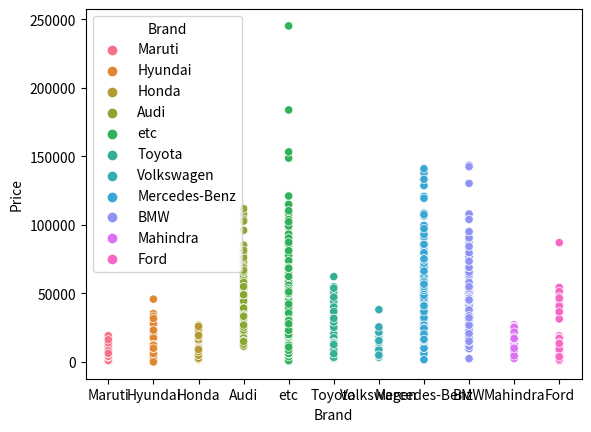

In [136]:
sns.scatterplot(x="Brand",y="Price",hue="Brand",data=df_raw)
plt.show()

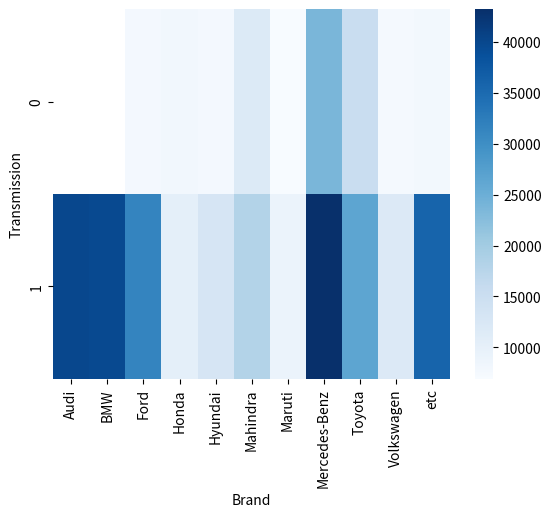

In [140]:
df_agg=df_raw.groupby(['Transmission',"Brand"],as_index=False)['Price'].mean()
df_pivot=df_agg.pivot("Transmission","Brand",'Price')
sns.heatmap(df_pivot,cmap='Blues')
plt.show()